In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [10]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='dark')
from scipy.stats import zscore

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, f1_score,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report,accuracy_score, precision_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [5]:
raw_df = pd.read_csv('train_clean_filled.csv')


,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
0,ID_YEB05X4KUGPQ,Mandalore,24.0,1346.15,7.0,1302.56,434.19,9.0,301.0,26.0,31.0,7.0,1.0,1.0,3,5.0,0,14
1,ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,3.0,1.0,1.0,62,31.0,0,3
2,ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,1.0,1.0,1.0,61,4.0,0,5
3,ID_QS4F5LEX29KM,Mandalore,24.0,1346.15,7.0,1302.56,434.19,9.0,301.0,26.0,31.0,7.0,1.0,1.0,6,5.0,0,14
4,ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,1.0,1.0,62,31.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507829,ID_D1MA2025F1U6,Mandalore,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,31.0,11.0,0.0,61.0,41,4.0,0,2
1507830,ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,7.0,1.0,1.0,36,2.0,0,4
1507831,ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,790.0,34.0,74.0,48.0,1.0,1.0,40,10.0,0,3
1507832,ID_B0S6HQUEDWJ7,Astral,24.0,1068.38,6.0,1068.38,355.98,8.0,0.0,60.0,31.0,7.0,1.0,1.0,39,4.0,0,12


In [11]:
raw_data = pd.read_csv('Train.csv')

In [8]:
raw_df.set_index('ID',inplace=True)
raw_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
ID,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,Mandalore,24.0,1346.15,7.0,1302.56,434.19,9.0,301.0,26.0,31.0,7.0,1.0,1.0,3,5.0,0,14
ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,3.0,1.0,1.0,62,31.0,0,3
ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,1.0,1.0,1.0,61,4.0,0,5
ID_QS4F5LEX29KM,Mandalore,24.0,1346.15,7.0,1302.56,434.19,9.0,301.0,26.0,31.0,7.0,1.0,1.0,6,5.0,0,14
ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,1.0,1.0,62,31.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,Mandalore,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,31.0,11.0,0.0,61.0,41,4.0,0,2
ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,7.0,1.0,1.0,36,2.0,0,4
ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,790.0,34.0,74.0,48.0,1.0,1.0,40,10.0,0,3


In [6]:
test_df = pd.read_csv('test_clean_filled.csv')

In [9]:
test_df.set_index('ID',inplace=True)
test_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Null_Count
ID,,,,,,,,,,,,,,,,
ID_LZ8K373W7EWV,Droidika,24.0,2008.550,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,1.0,1.0,59,11.0,2
ID_04KNWHGV5783,Luminous,24.0,2991.450,14.0,2991.45,997.01,17.0,807.5,99.0,100.0,84.0,1.0,1.0,49,12.0,3
ID_CXS07G6VLB2U,Astral,24.0,1581.200,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,1.0,1.0,13,6.0,2
ID_N3NFJJVHS25K,Eclipsara,24.0,2564.100,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,4.0,1.0,1.0,53,13.0,3
ID_R36J4ROT93E9,Mandalore,24.0,1391.025,7.0,1343.16,447.86,9.0,309.0,26.0,31.0,7.0,1.0,1.0,1,5.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,Stellaris,24.0,4273.500,19.0,4487.18,1495.73,20.0,60.0,60.0,208.0,80.0,1.0,1.0,54,20.0,3
ID_XGDT520DFBLP,Mandalore,24.0,6901.710,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,5.0,1.0,1.0,59,33.0,3
ID_9RDB792PB5Q4,Mandalore,24.0,2008.550,9.0,42.31,14.10,1.0,0.0,1.0,1.0,7.0,1.0,2.0,43,6.0,7


In [17]:
features = pd.get_dummies(raw_df.drop(columns='Target'))
targets = raw_df['Target']
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled  = rus.fit_resample(features,targets)
print(y_resampled.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.2, random_state=0)

0    282515
1    282515
Name: Target, dtype: int64


In [18]:
# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'reg_lambda': [0.01, 0.1, 0.2],
    'reg_alpha' : [0.01, 0.1, 0.2,],
}


# Create GridSearchCV instances
grid_search_xgb = GridSearchCV(
    xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=42),
    param_grid_xgb,
    scoring='roc_auc',  
    cv=5 
)

# Fit the models
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters for each model
best_params_xgb = grid_search_xgb.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Get the best models
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate the best models on the test set
y_pred_best_xgb = best_model_xgb.predict(X_test)

# Calculate metrics for the best models
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)

print("Best XGBoost Accuracy:", accuracy_best_xgb)


Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.2, 'reg_lambda': 0.1}
Best XGBoost Accuracy: 0.890855352813125


In [19]:
model_xgb = xgb.XGBClassifier(
    learning_rate = 0.01,
    max_dephth = 3,
    n_estimators = 50,
    objective='binary:logistic',  
    eval_metric='auc',
    reg_alpha = 0.01, 
    reg_lambda = 0.01,
    random_state=0
)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_dephth=3, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [20]:
xgb_accuracy = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='accuracy')
xgb_f1_score = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='f1')

print("XGBoost Cross-Validation Results:")
print("Accuracy:", xgb_accuracy.mean())
print("F1 Score:", xgb_f1_score.mean())

XGBoost Cross-Validation Results:
Accuracy: 0.8851122946852238
F1 Score: 0.8905166858517021


Accuracy: 0.8857848255844822
Confusion Matrix:
[[46968  9335]
 [ 3572 53131]]
___________________________
F1 Score: 0.8916916312128155
Feature ranking:
regularity: 0.5351529717445374
region_Mandalore: 0.19077880680561066
zone2: 0.09775912016630173
Null_Count: 0.0708824098110199
Amount: 0.03798815980553627
Procuct_2: 0.02248508296906948
region_Quasar: 0.018273403868079185
zone1: 0.007366953417658806
data_volume: 0.004837729502469301
region_Zodiacalia: 0.0025008160155266523
freq_top_pack: 0.0022949189879000187
Procuct_1: 0.0022594882175326347
arpu_segment: 0.001977586420252919
refill_frequency: 0.0017985121812671423
on_net: 0.00137603422626853
region_Nebula: 0.0010108646238222718
revenue: 0.0007402250193990767
frequency: 0.0005169234937056899
region_Radiantara: 0.0
region_Nebulith: 0.0
region_Eclipsara: 0.0
region_Droidika: 0.0
region_Luminous: 0.0
region_Forcehaven: 0.0
region_Eternum: 0.0
region_Stellaris: 0.0
region_Astral: 0.0
region_Celestial: 0.0
tenure: 0.0


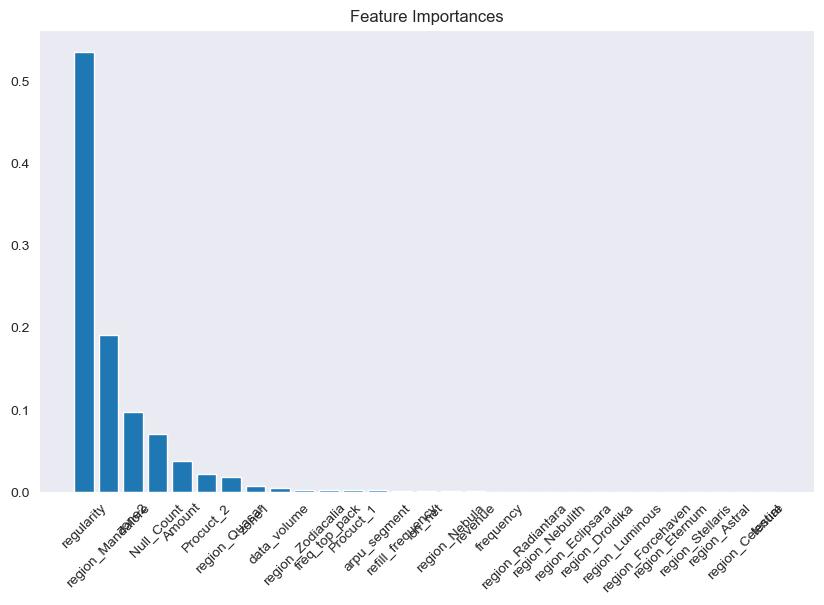

In [21]:
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('___________________________')
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
importances = model_xgb.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()

In [22]:
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
auc_roc_xgb = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
print("XGBoost Metrics:")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"AUC-ROC: {auc_roc_xgb:.4f}\n")
print('________________________________________________________')

XGBoost Metrics:
Precision: 0.8506
Recall: 0.9370
F1 Score: 0.8917
AUC-ROC: 0.9432

________________________________________________________


In [24]:
model_xgb2 = xgb.XGBClassifier(
    learning_rate = 0.1,
    max_dephth = 7,
    n_estimators = 200,
    objective='binary:logistic',  
    eval_metric='auc',
    reg_alpha = 0.02, 
    reg_lambda = 0.01,
    random_state=0
)
model_xgb2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_dephth=7, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [25]:
xgb_accuracy2 = cross_val_score(model_xgb2, X_train, y_train, cv=5, scoring='accuracy')
xgb_f1_score2 = cross_val_score(model_xgb2, X_train, y_train, cv=5, scoring='f1')

print("XGBoost Cross-Validation Results:")
print("Accuracy:", xgb_accuracy2.mean())
print("F1 Score:", xgb_f1_score2.mean())

XGBoost Cross-Validation Results:
Accuracy: 0.8904239601595583
F1 Score: 0.8969588945939495


Accuracy: 0.8907491637612163
Confusion Matrix:
[[46468  9835]
 [ 2511 54192]]
___________________________
F1 Score: 0.8977387559015986
Feature ranking:
regularity: 0.5351529717445374
region_Mandalore: 0.19077880680561066
zone2: 0.09775912016630173
Null_Count: 0.0708824098110199
Amount: 0.03798815980553627
Procuct_2: 0.02248508296906948
region_Quasar: 0.018273403868079185
zone1: 0.007366953417658806
data_volume: 0.004837729502469301
region_Zodiacalia: 0.0025008160155266523
freq_top_pack: 0.0022949189879000187
Procuct_1: 0.0022594882175326347
arpu_segment: 0.001977586420252919
refill_frequency: 0.0017985121812671423
on_net: 0.00137603422626853
region_Nebula: 0.0010108646238222718
revenue: 0.0007402250193990767
frequency: 0.0005169234937056899
region_Radiantara: 0.0
region_Nebulith: 0.0
region_Eclipsara: 0.0
region_Droidika: 0.0
region_Luminous: 0.0
region_Forcehaven: 0.0
region_Eternum: 0.0
region_Stellaris: 0.0
region_Astral: 0.0
region_Celestial: 0.0
tenure: 0.0


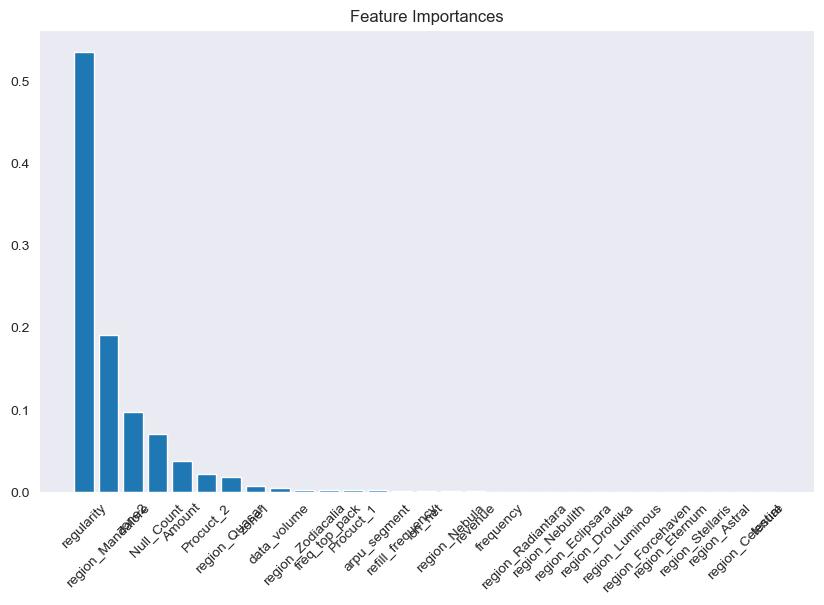

In [26]:
y_pred = model_xgb2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('___________________________')
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
importances = model_xgb.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()

In [27]:
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
auc_roc_xgb = roc_auc_score(y_test, model_xgb2.predict_proba(X_test)[:, 1])
print("XGBoost Metrics:")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"AUC-ROC: {auc_roc_xgb:.4f}\n")
print('________________________________________________________')

XGBoost Metrics:
Precision: 0.8464
Recall: 0.9557
F1 Score: 0.8977
AUC-ROC: 0.9471

________________________________________________________


In [29]:
test_df = pd.get_dummies(test_df)
test_df

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,...,region_Eternum,region_Forcehaven,region_Luminous,region_Mandalore,region_Nebula,region_Nebulith,region_Quasar,region_Radiantara,region_Stellaris,region_Zodiacalia
ID,,,,,,,,,,,,,,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.550,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,...,0,0,0,0,0,0,0,0,0,0
ID_04KNWHGV5783,24.0,2991.450,14.0,2991.45,997.01,17.0,807.5,99.0,100.0,84.0,...,0,0,1,0,0,0,0,0,0,0
ID_CXS07G6VLB2U,24.0,1581.200,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,...,0,0,0,0,0,0,0,0,0,0
ID_N3NFJJVHS25K,24.0,2564.100,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,4.0,...,0,0,0,0,0,0,0,0,0,0
ID_R36J4ROT93E9,24.0,1391.025,7.0,1343.16,447.86,9.0,309.0,26.0,31.0,7.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.500,19.0,4487.18,1495.73,20.0,60.0,60.0,208.0,80.0,...,0,0,0,0,0,0,0,0,1,0
ID_XGDT520DFBLP,24.0,6901.710,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,5.0,...,0,0,0,1,0,0,0,0,0,0
ID_9RDB792PB5Q4,24.0,2008.550,9.0,42.31,14.10,1.0,0.0,1.0,1.0,7.0,...,0,0,0,1,0,0,0,0,0,0


In [32]:
final_pred = model_xgb.predict(test_df)
final_pred
data = list(zip(test_df.index, final_pred))

result_df = pd.DataFrame(data, columns=['ID', 'Predictions'])
print(result_df)
print(result_df['Predictions'].value_counts())
result_df.to_csv('Submission4.1.1.csv',index=False)

                     ID  Predictions
0       ID_LZ8K373W7EWV            0
1       ID_04KNWHGV5783            0
2       ID_CXS07G6VLB2U            0
3       ID_N3NFJJVHS25K            0
4       ID_R36J4ROT93E9            1
...                 ...          ...
380122  ID_MGZSA4ICBD9O            0
380123  ID_XGDT520DFBLP            0
380124  ID_9RDB792PB5Q4            0
380125  ID_KDTJHH8L8Z13            0
380126  ID_2F6Y446GS8T3            1

[380127 rows x 2 columns]
0    266017
1    114110
Name: Predictions, dtype: int64


In [33]:
final_pred = model_xgb2.predict(test_df)
final_pred
data = list(zip(test_df.index, final_pred))

result_df = pd.DataFrame(data, columns=['ID', 'Predictions'])
print(result_df)
print(result_df['Predictions'].value_counts())
result_df.to_csv('Submission4.1.2.csv',index=False)

                     ID  Predictions
0       ID_LZ8K373W7EWV            0
1       ID_04KNWHGV5783            0
2       ID_CXS07G6VLB2U            0
3       ID_N3NFJJVHS25K            0
4       ID_R36J4ROT93E9            1
...                 ...          ...
380122  ID_MGZSA4ICBD9O            0
380123  ID_XGDT520DFBLP            0
380124  ID_9RDB792PB5Q4            0
380125  ID_KDTJHH8L8Z13            0
380126  ID_2F6Y446GS8T3            1

[380127 rows x 2 columns]
0    262332
1    117795
Name: Predictions, dtype: int64


In [34]:
raw_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
ID,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,Mandalore,24.0,1346.15,7.0,1302.56,434.19,9.0,301.0,26.0,31.0,7.0,1.0,1.0,3,5.0,0,14
ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,3.0,1.0,1.0,62,31.0,0,3
ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,1.0,1.0,1.0,61,4.0,0,5
ID_QS4F5LEX29KM,Mandalore,24.0,1346.15,7.0,1302.56,434.19,9.0,301.0,26.0,31.0,7.0,1.0,1.0,6,5.0,0,14
ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,1.0,1.0,62,31.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,Mandalore,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,31.0,11.0,0.0,61.0,41,4.0,0,2
ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,7.0,1.0,1.0,36,2.0,0,4
ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,790.0,34.0,74.0,48.0,1.0,1.0,40,10.0,0,3


In [35]:

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


# Create GridSearchCV instances
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=0),
    param_grid_rf,
    scoring='roc_auc', 
    cv=10  
)

grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for RandomForest:", best_params_rf)
best_model_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Best RandomForest Accuracy:", accuracy_best_rf)


KeyboardInterrupt: 

Random Forest Cross-Validation Results:
Accuracy: 0.8872869618425983
F1 Score: 0.8931346562649984

Accuracy: 0.8879086066226572
Confusion Matrix:
[[46824  9479]
 [ 3188 53515]]
___________________________
F1 Score: 0.8941744571710234
Feature ranking:
regularity: 0.2066807491140097
Null_Count: 0.13735154940706654
revenue: 0.08312429753501537
Amount: 0.07850849211212771
frequency: 0.06464931741548076
arpu_segment: 0.0617697895914595
on_net: 0.06060037791931441
region_Mandalore: 0.06037424410759646
zone2: 0.05401045021813334
refill_frequency: 0.04769893136980145
freq_top_pack: 0.0406220472176404
Procuct_1: 0.03392787618285449
data_volume: 0.03323632122725224
Procuct_2: 0.017478026402422974
zone1: 0.005249989465541091
region_Droidika: 0.005073547131234646
tenure: 0.0029788692231777466
region_Luminous: 0.0013267179978521738
region_Celestial: 0.0010782359304255301
region_Stellaris: 0.0010557196872318052
region_Quasar: 0.0009649103634067211
region_Eclipsara: 0.0008686712521992918
region_Nebul

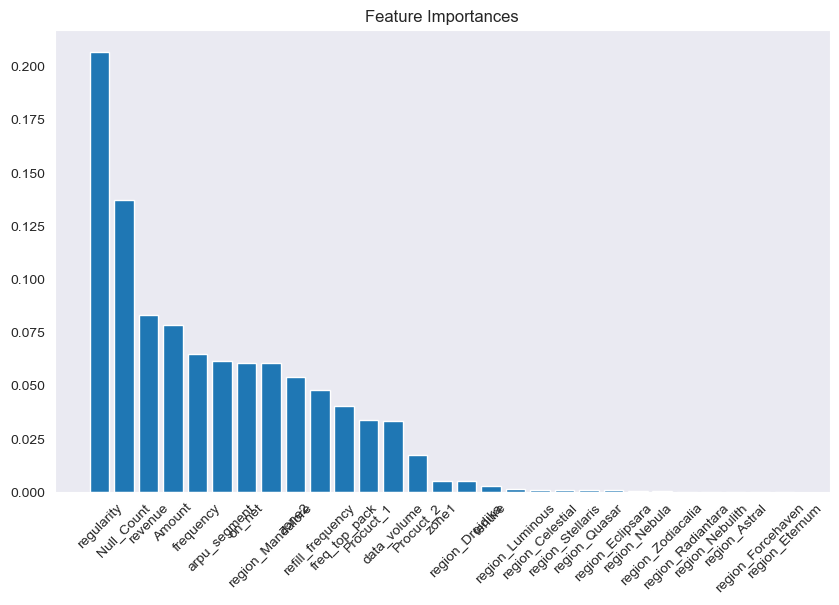

In [36]:
model_rf = RandomForestClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100, random_state=0)
model_rf.fit(X_train,y_train)
scoring = {'accuracy': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score)}

# Initialize cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validate Random Forest
rf_accuracy = cross_val_score(model_rf, X_train, y_train, cv=cv, scoring='accuracy')
rf_f1_score = cross_val_score(model_rf, X_train, y_train, cv=cv, scoring='f1')

print("Random Forest Cross-Validation Results:")
print("Accuracy:", rf_accuracy.mean())
print("F1 Score:", rf_f1_score.mean())
print()
y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('___________________________')
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Access feature importances
importances = model_rf.feature_importances_

# Get the indices that would sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()


In [38]:
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
auc_roc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])

print("RandomForest Metrics:")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"AUC-ROC: {auc_roc_rf:.4f}\n")
print('________________________________________________________')

RandomForest Metrics:
Precision: 0.8495
Recall: 0.9438
F1 Score: 0.8942
AUC-ROC: 0.9436

________________________________________________________


In [39]:
final_pred = model_rf.predict(test_df)
final_pred
data = list(zip(test_df.index, final_pred))

result_df = pd.DataFrame(data, columns=['ID', 'Predictions'])
print(result_df)
print(result_df['Predictions'].value_counts())
result_df.to_csv('Submission4.1.3.csv',index=False)

                     ID  Predictions
0       ID_LZ8K373W7EWV            0
1       ID_04KNWHGV5783            0
2       ID_CXS07G6VLB2U            0
3       ID_N3NFJJVHS25K            0
4       ID_R36J4ROT93E9            1
...                 ...          ...
380122  ID_MGZSA4ICBD9O            0
380123  ID_XGDT520DFBLP            0
380124  ID_9RDB792PB5Q4            0
380125  ID_KDTJHH8L8Z13            0
380126  ID_2F6Y446GS8T3            1

[380127 rows x 2 columns]
0    265065
1    115062
Name: Predictions, dtype: int64


The 4th round of submissions all average around 0.67 - 0.68. Thus what my plan is to use ensemble techniques to get the best our of the best of all worlds

initial plan:
- build 2 basic models using logistic regression & random forest on the log transformed and feature engineered data
- build 1 XGB & 1 LightGB model on the original messy data
- build 1 RF model & 1 XGB model on the cleaned and filled data without feature engineering
- Use XGB & CAT boosted models to use the 6 predictions + "Top_Pack" category to make final predictions (once with original data & then with imputing of the missing top pack values)

ensembleming techniques that I will add in the next round if the score achieved is above the previous best:
- voting methods for the simple models to then feed into XGB model to make second round of voting with RF model
- building the 6 initial predictions, however using LightGB, XGB, & CATboosted models to make 3 predictions for a voting method to be applied
- using the prediction from the simple models to then build second level of boosting model
- using LightGB & XGB predictions to enhance the messy data to feed into CATboosted model 

The 6th iteration will be about feature engineering to feed into the best performing ensemble method including clustering techniques to split the data into groups and building models based on those clusters and then combining those predictions

The 6th iteration will also be about using more advanced techniques for filling the missing values